In [1]:
# 케라스를 이용한 패션 아이템 이미지 인식 예제

In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist # 원본 데이터를 불러올 때 사용하는 클래스
from keras.utils import np_utils # 데이터 전처리에 사용하는 모듈

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D # CNN 모델에 사용할 클래스들
from tensorflow.keras.layers import Flatten, Dense # DNN 모델로 변환할 때 사용할 클래스들

Using TensorFlow backend.


In [3]:
# 하이퍼패러미터 설정
MY_BATCH = 200
MY_EPOCH = 10

In [4]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# 원본 데이터 확인하기
print("입력 데이터 shape:", x_train.shape) # 28*28 픽셀의 2차원 이미지를 60000장 구성한 3차원 배열
print("최소 픽셀값:", x_train.min()) # 0
print("최대 픽셀값:", x_train.max()) # 255

print("출력 데이터 shape:", y_train.shape) # 0~9 사이의 값을 60000개 구성한 1차원 배열
print("출력 최소값:", y_train.min())
print("출력 최대값:", y_train.max())

입력 데이터 shape: (60000, 28, 28)
최소 픽셀값: 0
최대 픽셀값: 255
출력 데이터 shape: (60000,)
출력 최소값: 0
출력 최대값: 9


In [6]:
# 출력 값에 해당하는 이름표 목록 생성
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

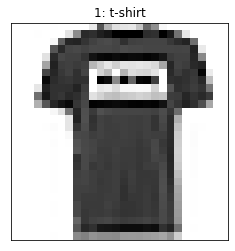

In [7]:
# 원본 이미지 시각화
num = 1

plt.imshow(x_train[num], cmap="Greys")

plt.title(str(num) + ": " + labels[y_train[num]])
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
# 입력 데이터 전처리
# 데이터 스케일링
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# 스케일링된 데이터 확인
print(x_train.min())
print(x_train.max())

0.0
1.0


In [10]:
# 입력 데이터 전처리
# 색상 채널 수 추가
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [11]:
# 입력 데이터 차원 수 확인
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
# 출력 데이터 전처리
# 범주형 데이터에 대해서 one-hot encoding 실시
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
# one-hot encoding된 데이터 확인
# y_train.shape
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
# Q8
x_train = x_train[0:30000]
y_train = y_train[0:30000]

In [15]:
# 인공 신경망 생성
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1))) # 입력층 추가


# 첫 번째 합성곱 신경망 추가
model.add(Conv2D(32, kernel_size=(2, 2), padding="same", activation="relu")) # Convolution layer 추가
# model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu")) # Q3
# model.add(Conv2D(16, kernel_size=(2, 2), padding="same", activation="relu")) # Q4
model.add(MaxPool2D(pool_size=(2, 2), padding="same")) # Pooling layer 추가


# 두 번째 합성곱 신경망 추가
model.add(Conv2D(64, kernel_size=(2, 2), padding="same", activation="relu")) # Convolution layer 추가
# model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu")) # Q3
# model.add(Conv2D(32, kernel_size=(2, 2), padding="same", activation="relu")) # Q4
model.add(MaxPool2D(pool_size=(2, 2), padding="same")) # Pooling layer 추가


# Fully-connected layer 추가 
model.add(Flatten())
model.add(Dense(128, activation="relu")) # 은닉층 추가
# model.add(Dense(256, activation="relu")) # Q5
model.add(Dense(10, activation="softmax")) # 출력층 추가


model.summary()
# model.save("fashion_before.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [16]:
# 인공 신경망 모델 환경 설정
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [17]:
# 학습 진행
from time import time

begin = time()
history = model.fit(x_train, y_train, batch_size=MY_BATCH, epochs=MY_EPOCH, verbose=1)
end = time()
print("총 학습시간:", end-begin)

# model.save("fashion_after.h5")

Epoch 1/10
150/150 [==============================] - 7s 44ms/step - loss: 0.6651 - acc: 0.7662
Epoch 2/10
150/150 [==============================] - 6s 41ms/step - loss: 0.4031 - acc: 0.8587
Epoch 3/10
150/150 [==============================] - 6s 41ms/step - loss: 0.3507 - acc: 0.8751
Epoch 4/10
150/150 [==============================] - 6s 43ms/step - loss: 0.3233 - acc: 0.8842
Epoch 5/10
150/150 [==============================] - 6s 42ms/step - loss: 0.2926 - acc: 0.8945
Epoch 6/10
150/150 [==============================] - 6s 41ms/step - loss: 0.2742 - acc: 0.9011
Epoch 7/10
150/150 [==============================] - 6s 42ms/step - loss: 0.2614 - acc: 0.9053
Epoch 8/10
150/150 [==============================] - 6s 41ms/step - loss: 0.2419 - acc: 0.9130
Epoch 9/10
150/150 [==============================] - 6s 42ms/step - loss: 0.2353 - acc: 0.9135
Epoch 10/10
150/150 [==============================] - 6s 43ms/step - loss: 0.2178 - acc: 0.9210
총 학습시간: 63.79321074485779


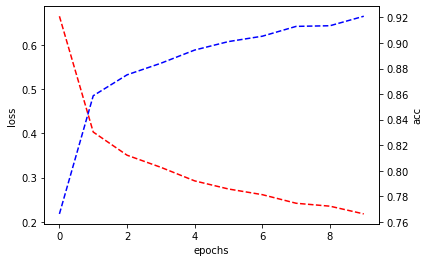

In [18]:
# 학습 내역 시각화
# plt.plot(history.history["loss"])
# plt.plot(history.history["acc"])

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # loss_ax axes 객체와 x축을 공유하는 axes 객체 생성

loss_ax.plot(history.history["loss"], "r--") # 손실값 변화량 시각화
acc_ax.plot(history.history["acc"], "b--") # 정확도 변화량 시각화

loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("acc")

plt.show()

In [19]:
# 평가 진행
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"{loss=}, {acc=}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2963 - acc: 0.8939
평가 loss: 0.29632872343063354
평가 acc: 0.8938999772071838


In [20]:
# 예측 진행
y_pred = model.predict(x_test)

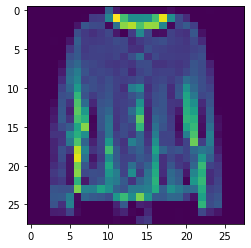

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.47994739e-03 2.43030227e-05 4.45504725e-01 1.43454445e-05
 1.87323112e-02 2.01851090e-05 5.26190400e-01 2.72014713e-08
 2.40242352e-05 9.81295216e-06]


In [21]:
# 예측 데이터 확인
num = 25

plt.imshow(x_test[num]) # 입력 데이터(이미지) 시각화
plt.show()
print(y_test[num]) # 출력 데이터(정답) 확인
print(y_pred[num]) # 예측 데이터 확인

In [22]:
# np.argmax() 함수 알아보는 예제
arr = np.array([[10, 5, 15], [17, 3, 8]])
print(arr)

print(np.argmax(arr)) # 전체 데이터 중 가장 큰 값의 인덱스
print(np.argmax(arr, axis=0)) # 열 별로 가장 큰 값의 인덱스
print(np.argmax(arr, axis=1)) # 행 별로 가장 큰 값의 인덱스

[[10  5 15]
 [17  3  8]]
3
[1 0 0]
[2 0]


In [23]:
# one-hot encoding 되돌리기
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [24]:
# 되돌린 데이터 결과 확인하기
num = 14
print(y_test[num])
print(y_pred[num])

4
4


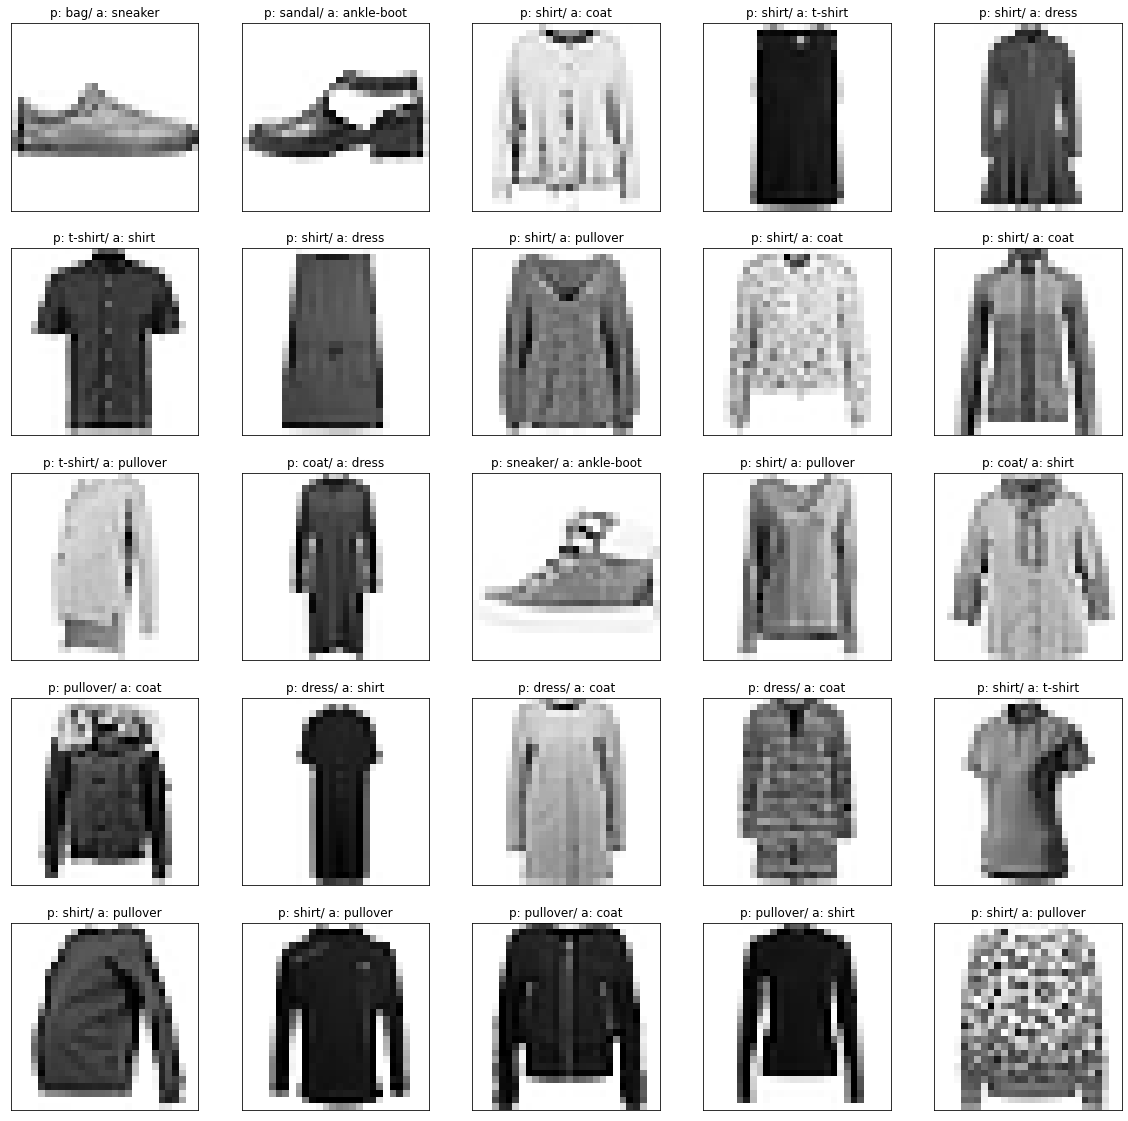

In [25]:
# 틀린 데이터 시각화
cnt = 0 # 시각화한 개수를 나타내주는 변수
num = 0 # 검사할 번호를 나타내주는 변수

fig, ax = plt.subplots(5, 5) # 5행 5열의 서브플롯 생성
fig.set_size_inches((20, 20)) # 시각화 결과물 크기 설정

while cnt < 25:
    if y_test[num] != y_pred[num]: # 예측이 틀린 경우
        # subplot에 틀린 결과 이미지를 추가해주는 코드
        ax[cnt // 5][cnt % 5].imshow(x_test[num], cmap="Greys")
        ax[cnt // 5][cnt % 5].set_xticks([])
        ax[cnt // 5][cnt % 5].set_yticks([])
        
        title = "p: " + labels[y_pred[num]] + "/ a: " + labels[y_test[num]]
        ax[cnt // 5][cnt % 5].set_title(title)
        
        cnt += 1
    
    num += 1

plt.show()

In [26]:
# 혼동 행렬을 통해 예측 결과 평가
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) # 실제 정답과 예측된 값을 이용해서 혼동 행렬 구성
cm = pd.DataFrame(cm)

display(cm)

,0,1,2,3,4,5,6,7,8,9
0,779,0,12,18,4,1,179,0,7,0
1,1,970,0,17,4,0,8,0,0,0
2,9,1,852,6,52,0,80,0,0,0
3,13,8,8,886,23,0,55,0,7,0
4,1,0,67,33,810,0,89,0,0,0
5,0,0,0,0,0,986,0,5,0,9
6,74,2,54,19,60,0,784,0,7,0
7,0,0,0,0,0,23,0,912,2,63
8,4,2,0,4,0,3,8,2,977,0
9,0,0,0,0,0,3,1,13,0,983


In [27]:
# f1 score 계산
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average="micro")
print(f1) # = accuracy

0.8939
